<a href="https://colab.research.google.com/github/anderson-ferreira-83/Data_Science_Repo_anderson83/blob/main/1_Alura_Voz/Week_2_data_analysis/p2_Analysis_for_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 2 - Data Analysis

In [1]:
import os # imports the os module for operating system related functionalities
import sys # imports the sys module for system-specific parameters and functions

In [2]:
import pandas as pd #

Now let´s import the JSON file we saved in the [previous notebook](https://github.com/sthemonica/challenge_dados_1/blob/bruno/1-Limpeza%20dos%20dados/limpeza.ipynb), with the cleaned data, so we can perform the analyses.

In [3]:
# Link to access the shared database file 'Telco-Customer-Churn-clean.json'
str_data_telco_cust_chrun_clean_file = '1--WyhFs-oY4xjPXyHd5Qatpio-2Z4zFa'
# Downloading file to current GoogleColab directory 'Telco-Customer-Churn-clean.json'
!gdown --id $str_data_telco_cust_chrun_clean_file

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1--WyhFs-oY4xjPXyHd5Qatpio-2Z4zFa
To: /content/Telco-Customer-Churn-clean.json
100% 2.22M/2.22M [00:00<00:00, 168MB/s]


In [4]:
# Reading database
data_db = pd.read_json('Telco-Customer-Churn-clean.json')
data_db.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


After the initial data cleaning, it's ideal to perform a graphical analysis to understand which variables are related to churn. This helps the sales team get a sense of the current scenario and allows us to understand the situation more clearly and form possible hypotheses about what is happening with the customers.

The first step is to import the libraries we will use during the process. In this step, we will also import some functions from utils, a Python file where we created helper functions to keep our notebook less cluttered. This approach is useful when we want to use the functions in more than one notebook.

In [5]:
# Link to access the functions of model
str_utils = '1DJEF0jli6eQixbcz-ARBX7X5d9ojoP4J'
# Downloading file to current GoogleColab directory 'utils.py'
!gdown --id $str_utils

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1DJEF0jli6eQixbcz-ARBX7X5d9ojoP4J
From (redirected): https://drive.google.com/uc?id=1DJEF0jli6eQixbcz-ARBX7X5d9ojoP4J&confirm=t&uuid=bb02824a-adfb-4047-aeb7-ab1e22b8d031
To: /content/utils.py
100% 6.37k/6.37k [00:00<00:00, 17.2MB/s]


In [6]:
from utils import plot_countplot, heatmap_corr #

In [7]:
from plotly.express import box #

In [8]:
import pandas as pd #
import seaborn as sns #
import matplotlib.pyplot as plt #

### Analyzing Churn

To start analyzing, let´s use the `.describe()` method to understand some statistical methods within the dataset.

The `describe()` method provides information on:

* `count` - Counts the number of non-empty values. These values help us better understand the sample size.

* `mean` - The average value, in arithmetic mean. Since it calculates an arithmetic mean, it does not always represent the reality of most cases in the database.

* `std` - The standard deviation. It measures how data is dispersed relative to the mean, indicating how spread out they are.

* `min` and `max` - Values that help identify the sample´s range, between the mininum and maximum values.

* `quartis` - Values that show how the data is distributed, for example, the 50% mark is the median, where half of the values are below a certain value, and the other half are above that value.

 To learn about this method, visit the article [Ampliando a análise com o Describe](https://www.alura.com.br/artigos/ampliando-a-analise-com-describe).

In [9]:
# There are only 3 variables because they are the only numeric ones and the others are categorical
data_db.describe().round(2)

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2279.80
std,0.37,24.56,30.09,2266.73
min,0.00,0.00,18.25,18.80
25%,0.00,9.00,35.50,398.55
50%,0.00,29.00,70.35,1394.55
75%,0.00,55.00,89.85,3786.60
max,1.00,72.00,118.75,8684.80


We can see that only 4 columns can be analyzed with the `.describe()` method, so we will use `.dtypes` to understand what types of data we have within our database.

In [10]:
data_db.dtypes #

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


As we can see, most of the data we have is **object**, and the method cannot work with categorical variables **unless** a parameter is passed allowing this inclusion, however some of our analyses of the `.describe()` method may be lost.

In [11]:
data_db.describe(include=[object]) # To analyze features that are categorical, we can use include

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


Our `.describe()` method returned 3 different lines from the ones we already knew:

* `unique` is the number of unique values
* `top` is the most common value
* `freq` is the frequency of the most common value

But even with these values, it is still difficult to get answers and pass something concrete to the sales team to evaluate, especially to formulate a hypothesis about churn, so now we will move on to the graphical part.

### Graphical analysis

In this section, it is interesting to focus on which visualizations will be best to present to our teammates, and for this we can watch the video [Data Visualization: types of visualization](https://cursos.alura.com.br/extra/alura-mais/data-visualization-tipos-de-visualizacao-c1409). The graphs can be made using Matplotlib, Seaborn or any other graphic library of your choice.

The first analysis to be done is the distribution of the target variable, Churn, to understand how many cases we have of people who canceled their contracts and how many still have an active contract. To do this, we will use the `plot_countplot` function from the **utils** file, which uses the `countplot` from the Seaborn library and you can check out more about it in the course [Data Visualization: exploring with Seaborn](https://cursos.alura.com.br/course/data-visualization-com-seaborn) and to learn specifically about the function, you can check out the [documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html).

/content/utils.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x, hue=hue, data=data_db, palette=colors)


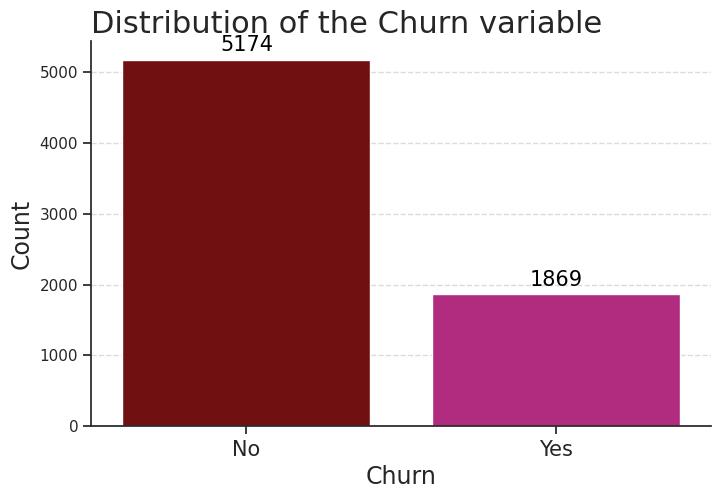

In [12]:
#
plot_countplot(data_db = data_db,
               x='Churn',
               titulo="Distribution of the Churn variable",
               label_x='Churn')

We can also analyze by gender variable to see if there is any impact on whether the person is, in this case, male or female.

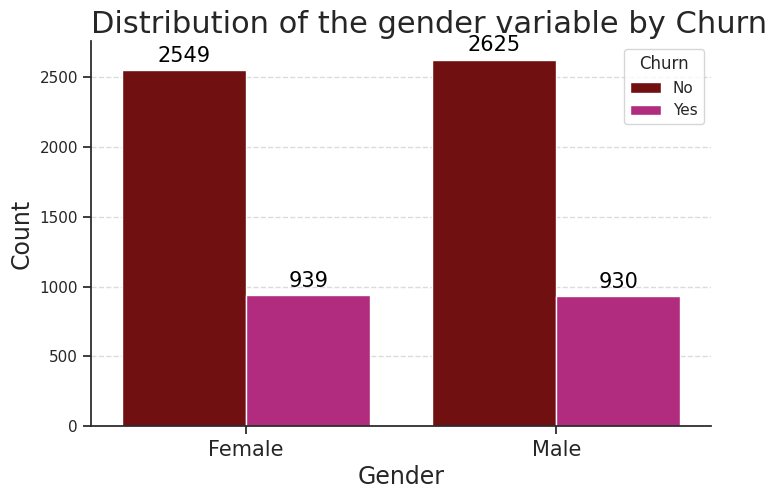

In [13]:
# Plotando o gráfico de Gênero
plot_countplot(data_db=data_db,
               x='gender',
               titulo="Distribution of the gender variable by Churn",
               label_x='Gender',
               hue='Churn')

We can see that the "gender" variable **has no impact on churn**, since the proportion of people who canceled the service between genders is the same.

Let's plot the graphs for the internet services:

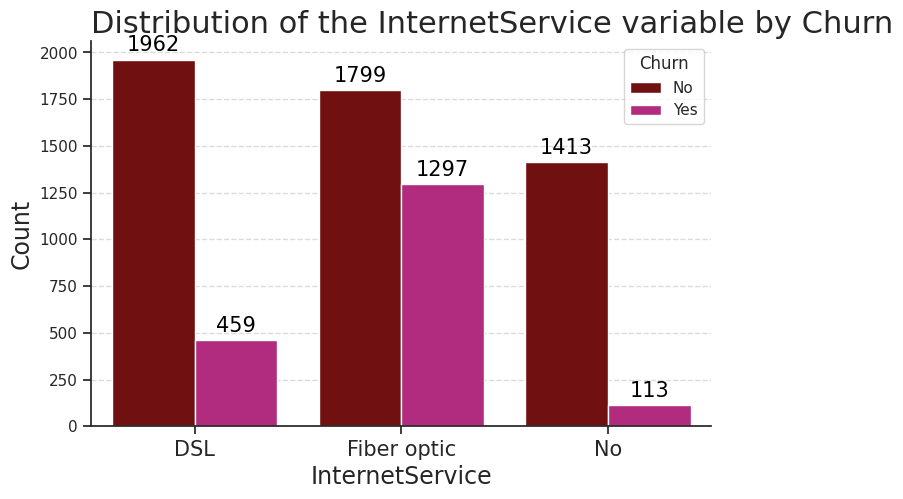

In [14]:
# Plotting the internet service graph
plot_countplot(data_db=data_db,
               x='InternetService',
               titulo="Distribution of the InternetService variable by Churn",
               label_x='InternetService',
               hue='Churn')

Analyzing the graph above, it can be seen that customers who use fiber optics as an internet service have a proportionally higher churn rate than others. Alura Voz could offer more DSL service since it has a lower churn rate, or identify what problems are occurring with the fiber optic service and improve it.

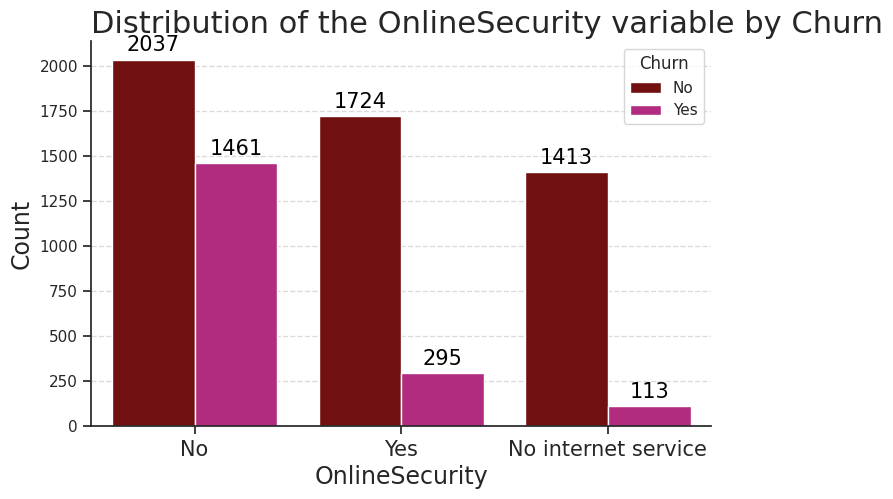

In [15]:
# Plotting the graph regarding whether the client has online security or not
plot_countplot(data_db=data_db,
               x='OnlineSecurity',
               titulo="Distribution of the OnlineSecurity variable by Churn",
               label_x='OnlineSecurity',
               hue='Churn')

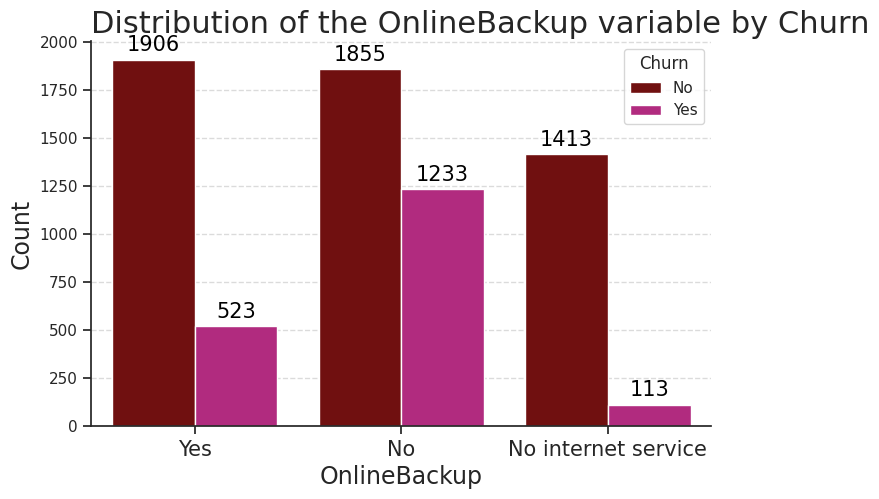

In [16]:
# Plotting the graph regarding whether or not the client has an online backup
plot_countplot(data_db=data_db,
               x='OnlineBackup',
               titulo="Distribution of the OnlineBackup variable by Churn",
               label_x='OnlineBackup',
               hue='Churn')

From the graph above, we can see that customers who do not subscribe to online security and do not have online backup tend to stop using Alura Voz services. Offering an online security and online backup service would be a good option to reduce the cancellation rate.

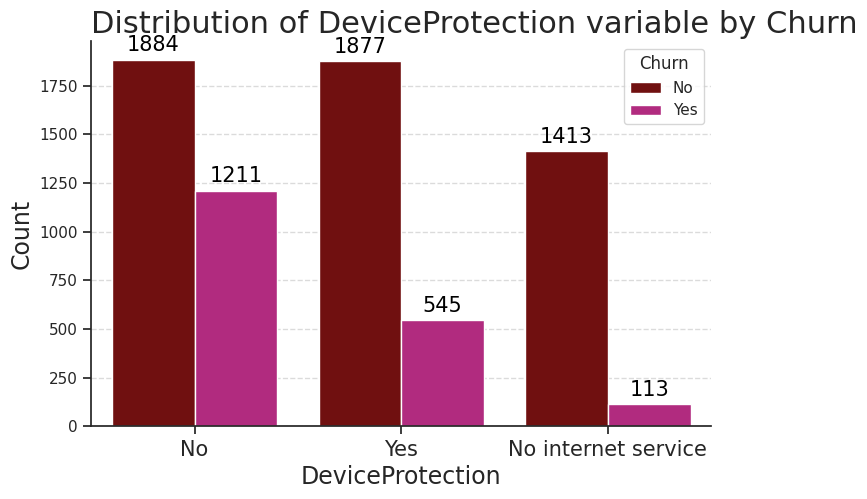

In [17]:
# Plotting the graph regarding whether the client has device protection or not
plot_countplot(data_db=data_db,
               x='DeviceProtection',
               titulo="Distribution of DeviceProtection variable by Churn",
               label_x='DeviceProtection',
               hue='Churn')

From the graph above, we can see that customers who do not have device protection tend to stop using Alura Voz services. Offering a protection service is a good option to reduce the cancellation rate.

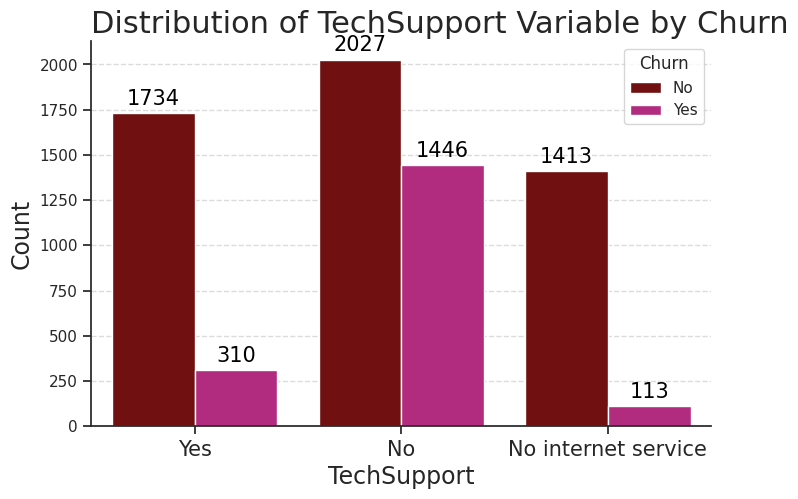

In [18]:
# Plotting the graph regarding whether the customer has technical support or not.
plot_countplot(data_db=data_db,
               x='TechSupport',
               titulo="Distribution of TechSupport Variable by Churn",
               label_x='TechSupport',
               hue='Churn')

Customers who do not have technical support tend to stop using Alura Voz services. Offering a technical support service is a good option to reduce the cancellation rate.

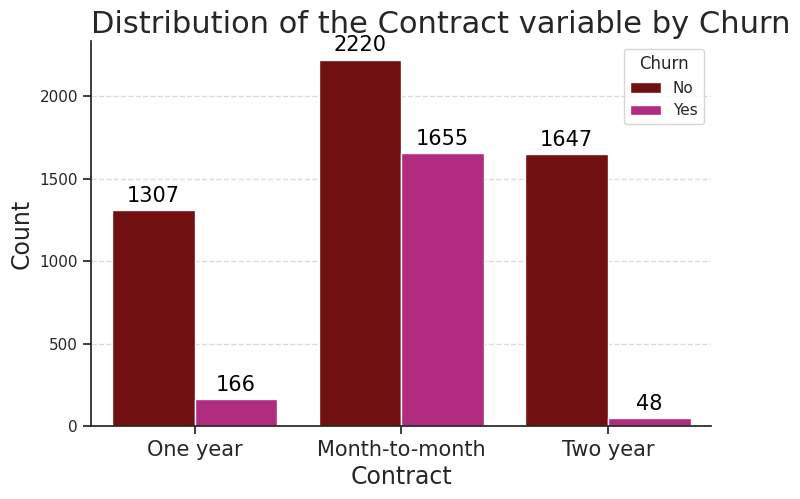

In [20]:
# Plotting the graph regarding the term of the customer's contract
plot_countplot(data_db=data_db,
               x='Contract',
               titulo="Distribution of the Contract variable by Churn",
               label_x='Contract',
               hue='Churn')

From the graph above, we can see that customers who have a monthly contract are the ones who tend to stop using Alura Voz services. Offering an annual or two-year contract service is a good option to reduce the cancellation rate.

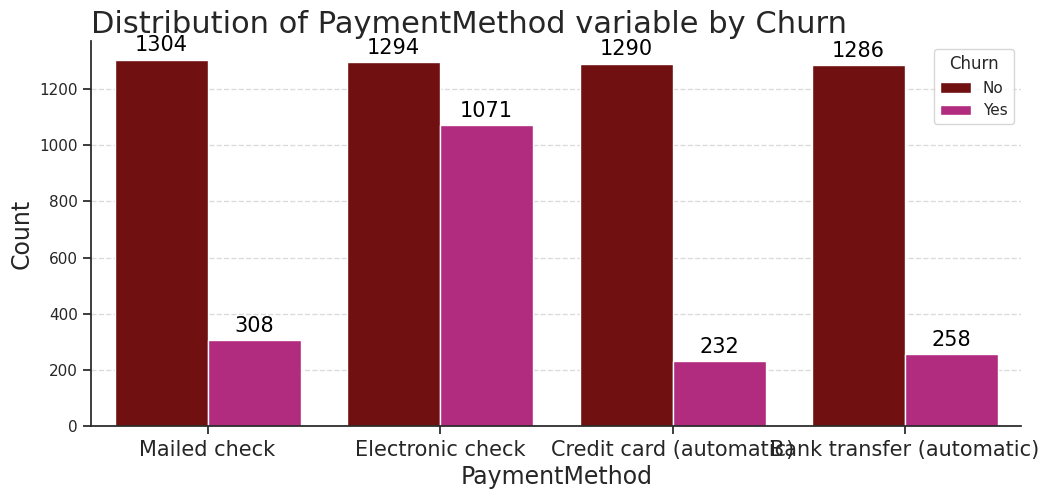

In [21]:
# Plotting the graph regarding the customer's payment method
plot_countplot(data_db=data_db,
               x='PaymentMethod',
               titulo="Distribution of PaymentMethod variable by Churn",
               label_x='PaymentMethod',
               hue='Churn',
               figsize=(12, 5))

We have noticed that people using the "Electronic check" payment method tend to cancel Alura Voz services. Directing customers to another payment method is a good option to reduce the cancellation rate.

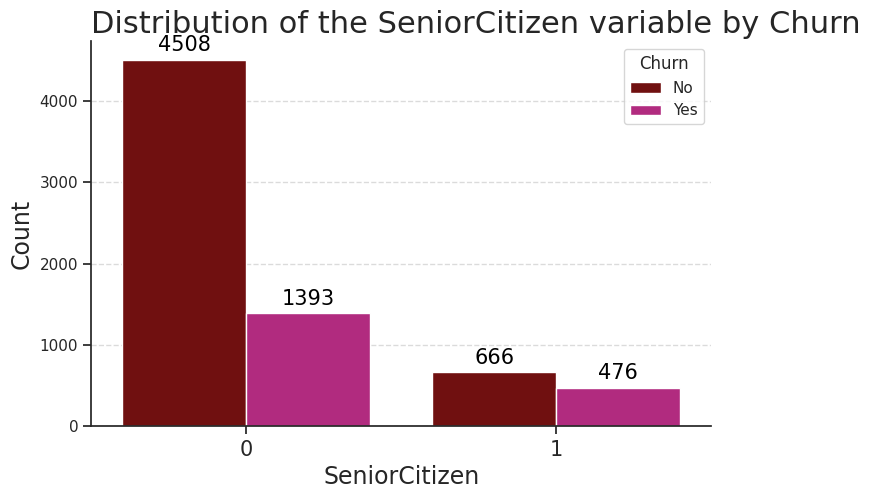

In [22]:
# Plotting the graph of whether the customer is elderly or not due to churn.
plot_countplot(data_db=data_db,
               x='SeniorCitizen',
               titulo="Distribution of the SeniorCitizen variable by Churn",
               label_x='SeniorCitizen',
               hue='Churn')

Although the number of elderly customers is smaller, the proportion of customers who canceled the service among elderly customers is higher than that of non-elderly customers. Understanding the reasons that are leading to this cancellation rate among elderly customers and adopting measures to improve the service for these customers is a good option to reduce the cancellation rate.

To perform a more in-depth analysis, we can apply the boxplot, and to learn more, you can read this article: [Improving analysis with the Boxplot](https://www.alura.com.br/artigos/melhorando-a-analise-com-o-boxplot).

In [23]:
# Imprimindo boxplot com o plotly
for col in ['tenure', 'Charges.Monthly']:
    fig = box(data_db, x=col, color='Churn', orientation='h')
    fig.show()

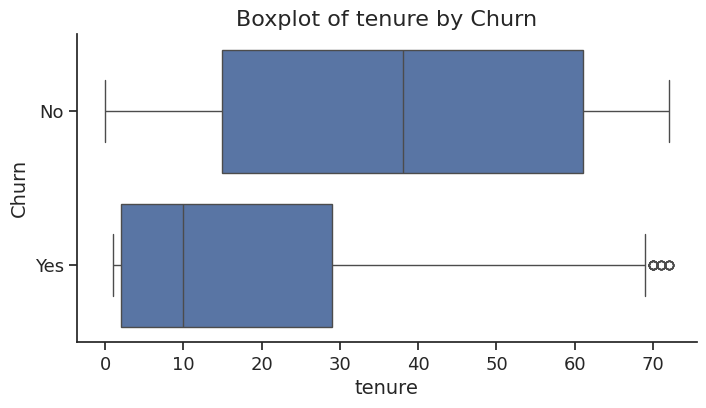

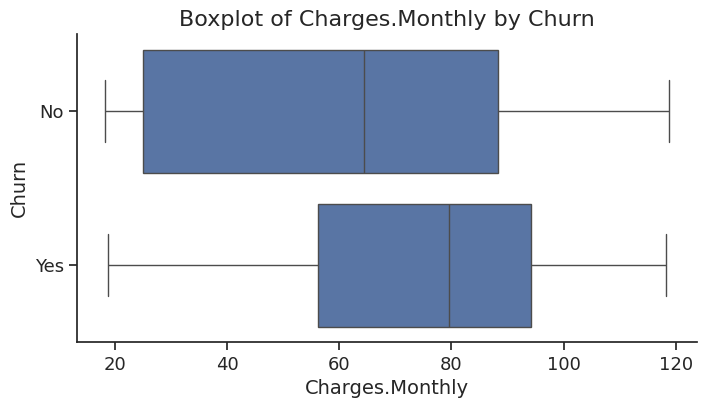

In [24]:
# Box Plot of numerical features.
for col in ['tenure', 'Charges.Monthly']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y='Churn', data=data_db)
    plt.title(f"Boxplot of {col} by Churn", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Churn', fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

Analyzing the "tenure" feature, which represents the customer's contract time, we can see that customers who have been with the service for longer tend to continue using it.

For the "Charges.Monthly" feature, we can see that customers who purchase cheaper services tend to continue using the service.

## Analyzing feature

In [25]:
# Show unique values ​​of problematic column
print(data_db['Charges.Total'].unique())

# Identify rows with non-numeric values
non_numeric_rows = data_db[pd.to_numeric(data_db['Charges.Total'], errors='coerce').isna()]
print(non_numeric_rows)


[ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


Let's analyze the features "tenure" and "Charges.Monthly" and "Charges.Total" which are apparently correlated.

In [26]:
# Plotting the correlation between numerical features
heatmap_corr(data_db)

ValueError: could not convert string to float: '0002-ORFBO'

In [27]:
data_db[['Charges.Monthly', 'Charges.Total']].corr().round(2)

,Charges.Monthly,Charges.Total
Charges.Monthly,1.00,0.65
Charges.Total,0.65,1.00


The features "tenure" and "Charges.Total" have a strong correlation, which means that as one increases the other increases as well. It is not very interesting to work with two correlated features, so we will remove the "Charges.Total" feature.